In [65]:
import cv2
from matplotlib import pyplot as plt
import numpy as np

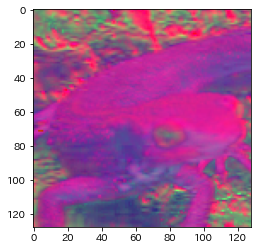

In [66]:
# BGR -> HSV
img = cv2.imread("../assets/imori.jpg")
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
plt.imshow(hsv[:,:,::-1])

In [67]:
# define range of blue color in HSV
lower = np.array([110, 50, 50])
upper = np.array([130, 255, 255])

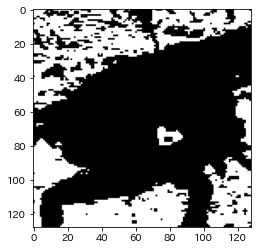

In [68]:
# Making mask
mask = cv2.inRange(hsv, lower, upper)
res = cv2.bitwise_and(hsv, hsv, mask=mask)
plt.imshow(mask, cmap="gray")

In [69]:
kernel = np.array([[0, 1, 0],
                             [1, 0, 1],
                             [0, 1, 0]]).astype(np.uint8)

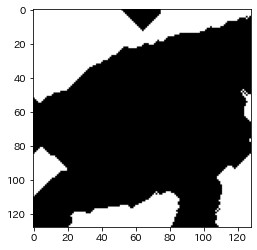

In [70]:
# Dilation
dilation = cv2.dilate(mask, kernel, iterations=5)
# Erosion
mask = cv2.erode(dilation, kernel, iterations=10)
plt.imshow(erosion, cmap="gray")

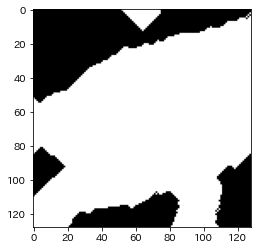

In [71]:
#  Masking
mask = cv2.bitwise_not(mask)
kernel = np.array(((0,1,0),
                                  (1,0,1),
                                  (0,1,0)), dtype= np.uint8)
mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel, iterations=4)
mask = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel, iterations=6)
plt.imshow(mask, cmap= "gray")

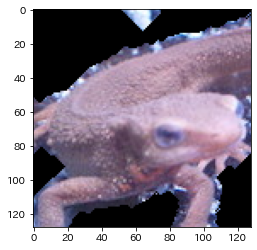

In [72]:
# Mask
res = cv2.bitwise_and(img, img, mask=mask)
plt.imshow(res[:,:,::-1], cmap="gray")